# Natural Language Processing - Project

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential, losses
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding, LSTM, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.constraints import unit_norm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import plot_model

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import re
import string

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Sentiment Analysis on Movie Review

#### 1. Import and analyse the data set. [5 Marks]

In [3]:
#Setting the values
vocab_size=10000
max_length = 300

In [4]:
#Loading the dataset
(xtra, ytra), (xtes, ytes) = imdb.load_data(num_words=vocab_size) #Taking 10000 as the most frequent words (Vocab size)

17464789/17464789 [==============================] - 2s 0us/step


In [5]:
#Analysing the size of datasets
print('Shape of XTrain', xtra.shape)
print('Shape of XTest', xtes.shape)
print('Shape of YTrain', ytra.shape)
print('Shape of YTest', ytes.shape)

Shape of XTrain (25000,)
Shape of XTest (25000,)
Shape of YTrain (25000,)
Shape of YTest (25000,)


- Since the train & test set are equally divided, we combine them as of now.
- Later we split the dataset with train & test set in ratio of 90:10, so that we have more training data.

In [6]:
#Concatenating the data
data = np.concatenate((xtra, xtes), axis=0) #Combining the Features
label = np.concatenate((ytra, ytes), axis=0) #Combining the Labels

In [7]:
#Checking the unique value for data & labels
print('Total number of unique words present in data is:', len(np.unique(np.hstack(data))))
print('Total number of unique labels is {} & the labels are {}'.format(len(np.unique(label)), np.unique(label)))

Total number of unique words present in data is: 9998
Total number of unique labels is 2 & the labels are [0 1]


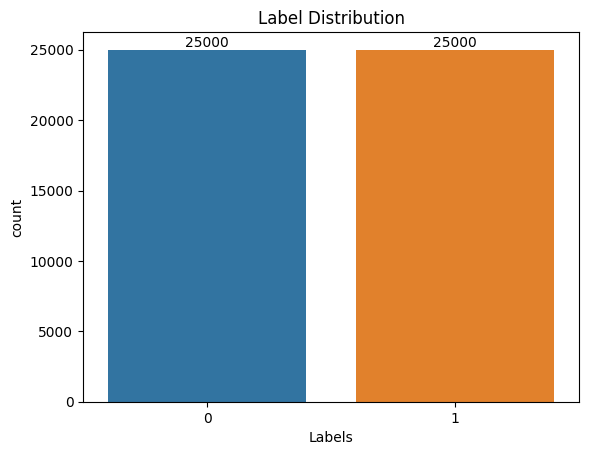

In [8]:
#Creating the DataFrame of the data & label
IMDB = pd.DataFrame({'Data': data, 'Labels': label})

#Checking the distribution of labels in the dataset
sns.countplot(data = IMDB, x = 'Labels')
for i in range(len(IMDB['Labels'].value_counts())):
    plt.text(i, IMDB['Labels'].value_counts()[i]+200, IMDB['Labels'].value_counts()[i], ha='center')
plt.title('Label Distribution')
plt.show();

Here we observe that the label corresponding to 0 and to 1 are equal. Hence the dataset is balanced.

#### 2. Perform relevant sequence adding on the data. [5 Marks]

In [9]:
#Performing sequence adding on data
data = pad_sequences(data, max_length, padding='post', truncating='post')

In [10]:
#Checking the shape of data after sequence adding
data.shape

(50000, 300)

#### 3. Perform following data analysis: [5 Marks]
Print shape of features and labels.
Print value of any one feature and it's label

In [11]:
#Printing the shape of data & labels
print('Shape of Features:', data.shape)
print('Shape of Labels:', label.shape)

Shape of Features: (50000, 300)
Shape of Labels: (50000,)


In [12]:
#Printing the value of Feature 1
data[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [13]:
#Printing the corresponding value of Label 1 for above feature
label[0]

1

#### 4. Decode the feature value to get original sentence [5 Marks]

In [14]:
#Mapping the labels 0 & 1 to its original sentiment i.e. Negative & Positive respectively
sentiment = {1: 'Positive', 0: 'Negative'}

#Defining a function to decode & print the decoded review alongwith its Sentiment
def decode(x, y):
    reverse_index = dict([(value, key) for (key,value) in imdb.get_word_index().items()])
    decoded_review = ' '.join([reverse_index.get(i-3, '#') for i in x])
    print('Original Decoded Review:')
    print(decoded_review)
    print('Original Sentiment: {}/{}'.format(y, sentiment.get(y)))
    return

decode(data[1], label[1])

1641221/1641221 [==============================] - 1s 1us/step
Original Decoded Review:
# big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal # the hair is big lots of boobs # men wear those cut # shirts that show off their # sickening that men actually wore them and the music is just # trash that plays over and over again in almost every scene there is trashy music boobs and # taking away bodies and the gym still doesn't close for # all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how

#### 5. Design, train, tune and test a sequential model. [5 Marks]

In [15]:
#Splitting the dataset into train_test set with 90:10 ratio
x_tr, x_te, y_tr, y_te = train_test_split(data, label, test_size=0.1, random_state=1, stratify=label)

In [16]:
#Printing the shape of new train & test set
print('Shape of Feature - Train set:', x_tr.shape)
print('Shape of Feature - Test Set:', x_te.shape)
print('Shape of Label - Train Set:', y_tr.shape)
print('Shape of Label - Test Set:', y_te.shape)

Shape of Feature - Train set: (45000, 300)
Shape of Feature - Test Set: (5000, 300)
Shape of Label - Train Set: (45000,)
Shape of Label - Test Set: (5000,)


### Building Keras Embedding Layer Model

#### Designing an Artificial Neural Network

In [17]:
embedding_dim = 300

In [18]:
#Building the Network
ann = Sequential()
ann.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
ann.add(Flatten())
ann.add(Dense(1, activation='sigmoid'))

#Compiling the Model
ann.compile(optimizer=Adam(), loss=losses.binary_crossentropy, metrics=['accuracy'])

In [19]:
#Summary of the model
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          3000000   
                                                                 
 flatten (Flatten)           (None, 90000)             0         
                                                                 
 dense (Dense)               (None, 1)                 90001     
                                                                 
Total params: 3,090,001
Trainable params: 3,090,001
Non-trainable params: 0
_________________________________________________________________


In [20]:
#Fitting the Model
ANN = ann.fit(x_tr, y_tr, epochs=10, batch_size=256, validation_split=0.2)

Epoch 1/10
141/141 [==============================] - 39s 240ms/step - loss: 0.4818 - accuracy: 0.7584 - val_loss: 0.3053 - val_accuracy: 0.8750
Epoch 2/10
141/141 [==============================] - 22s 155ms/step - loss: 0.2085 - accuracy: 0.9263 - val_loss: 0.2839 - val_accuracy: 0.8832
Epoch 3/10
141/141 [==============================] - 15s 107ms/step - loss: 0.1011 - accuracy: 0.9753 - val_loss: 0.2920 - val_accuracy: 0.8798
Epoch 4/10
141/141 [==============================] - 9s 64ms/step - loss: 0.0415 - accuracy: 0.9959 - val_loss: 0.3149 - val_accuracy: 0.8786
Epoch 5/10
141/141 [==============================] - 8s 55ms/step - loss: 0.0189 - accuracy: 0.9991 - val_loss: 0.3382 - val_accuracy: 0.8803
Epoch 6/10
141/141 [==============================] - 9s 61ms/step - loss: 0.0103 - accuracy: 0.9998 - val_loss: 0.3468 - val_accuracy: 0.8822
Epoch 7/10
141/141 [==============================] - 5s 33ms/step - loss: 0.0065 - accuracy: 0.9999 - val_loss: 0.3637 - val_accuracy: 

In [21]:
#Model Evaluation
print('Evaluating Training Set for ANN Model:\n')
tra_loss, tra_accuracy = ann.evaluate(x_tr, y_tr)
print('Training Loss: {:.4f} and Training Accuracy: {:.4f}'.format(tra_loss, tra_accuracy))

print('\n')
print('Evaluating Testing Set for ANN Model:\n')
tes_loss, tes_accuracy = ann.evaluate(x_te, y_te)
print('Testing Loss: {:.4f} and Testing Accuracy: {:.4f}'.format(tes_loss, tes_accuracy))

Evaluating Training Set for ANN Model:

1407/1407 [==============================] - 3s 2ms/step - loss: 0.0811 - accuracy: 0.9764
Training Loss: 0.0811 and Training Accuracy: 0.9764


Evaluating Testing Set for ANN Model:

157/157 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8760
Testing Loss: 0.4025 and Testing Accuracy: 0.8760


157/157 [==============================] - 0s 2ms/step
-------------------- Confusion Matrix --------------------


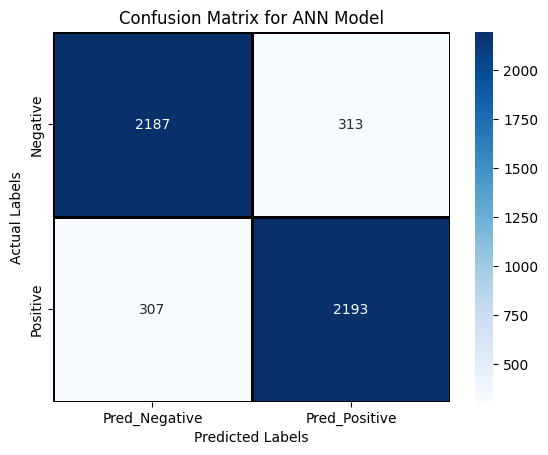




-------------------- Classification Report for ANN Model --------------------
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2500
           1       0.88      0.88      0.88      2500

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



In [22]:
#Predicting the values
ann_pred = (ann.predict(x_te) > 0.5).astype('int32')

#Printing Confusion Matrix using Heatmap
print('-'*20, 'Confusion Matrix', '-'*20)
ann_cm = confusion_matrix(y_te, ann_pred)
sns.heatmap(ann_cm, cmap='Blues', annot=True, fmt='g', linecolor='black', linewidth=1, xticklabels=['Pred_Negative', 'Pred_Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for ANN Model')
plt.show();

print('\n\n')
print('-'*20, 'Classification Report for ANN Model', '-'*20)
ann_cr = classification_report(y_te, ann_pred)
print(ann_cr)

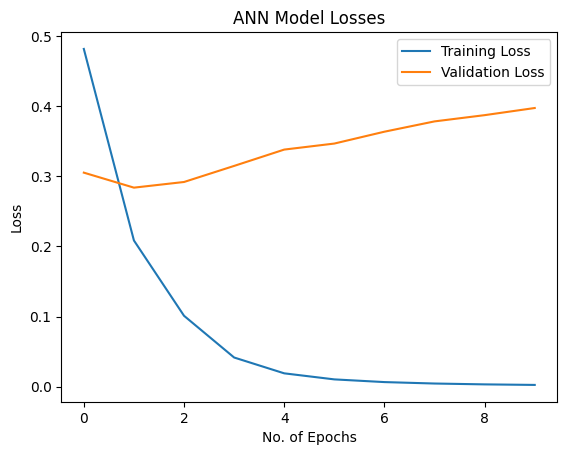

In [23]:
#Plotting Training Loss & Validation Loss vs Number of Epochs
plt.plot(ANN.history['loss'])
plt.plot(ANN.history['val_loss'])
plt.title('ANN Model Losses')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='best')
plt.show();

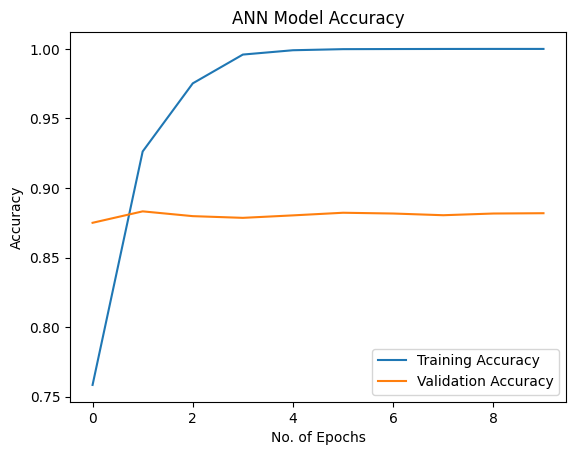

In [24]:
#Plotting Training Accuracy & Validation Accuracy vs Number of Epochs
plt.plot(ANN.history['accuracy'])
plt.plot(ANN.history['val_accuracy'])
plt.title('ANN Model Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='best')
plt.show();

#### Designing Recurrent Neural Network (LSTM) Model

In [25]:
#Building the Network
rnn = Sequential()
rnn.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
rnn.add(LSTM(128, activation='tanh'))
rnn.add(Dense(64, activation='relu'))
rnn.add(Dense(1, activation='sigmoid'))

#Compiling the Model
rnn.compile(optimizer=Adam(), loss=losses.binary_crossentropy, metrics=['accuracy'])

In [26]:
#RNN Model Summary
rnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 300)          3000000   
                                                                 
 lstm (LSTM)                 (None, 128)               219648    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3,227,969
Trainable params: 3,227,969
Non-trainable params: 0
_________________________________________________________________


In [27]:
#Fitting the Model
RNN = rnn.fit(x_tr, y_tr, epochs=10, batch_size=256, validation_split=0.2)

Epoch 1/10
141/141 [==============================] - 30s 187ms/step - loss: 0.6919 - accuracy: 0.5156 - val_loss: 0.6852 - val_accuracy: 0.5241
Epoch 2/10
141/141 [==============================] - 19s 135ms/step - loss: 0.6898 - accuracy: 0.5469 - val_loss: 0.6699 - val_accuracy: 0.5508
Epoch 3/10
141/141 [==============================] - 16s 111ms/step - loss: 0.6349 - accuracy: 0.5997 - val_loss: 0.6768 - val_accuracy: 0.5181
Epoch 4/10
141/141 [==============================] - 15s 104ms/step - loss: 0.6667 - accuracy: 0.5714 - val_loss: 0.6666 - val_accuracy: 0.5657
Epoch 5/10
141/141 [==============================] - 14s 97ms/step - loss: 0.6211 - accuracy: 0.6216 - val_loss: 0.6513 - val_accuracy: 0.5972
Epoch 6/10
141/141 [==============================] - 11s 82ms/step - loss: 0.5325 - accuracy: 0.7151 - val_loss: 0.3955 - val_accuracy: 0.8312
Epoch 7/10
141/141 [==============================] - 10s 71ms/step - loss: 0.2640 - accuracy: 0.8962 - val_loss: 0.3191 - val_accur

In [28]:
#Model Evaluation
print('Evaluating Training Set for RNN Model:\n')
tra_loss, tra_accuracy = rnn.evaluate(x_tr, y_tr)
print('Training Loss: {:.4f} and Training Accuracy: {:.4f}'.format(tra_loss, tra_accuracy))

print('\n')
print('Evaluating Testing Set for RNN Model:\n')
tes_loss, tes_accuracy = rnn.evaluate(x_te, y_te)
print('Testing Loss: {:.4f} and Testing Accuracy: {:.4f}'.format(tes_loss, tes_accuracy))

Evaluating Training Set for RNN Model:

1407/1407 [==============================] - 9s 6ms/step - loss: 0.1514 - accuracy: 0.9545
Training Loss: 0.1514 and Training Accuracy: 0.9545


Evaluating Testing Set for RNN Model:

157/157 [==============================] - 1s 8ms/step - loss: 0.3424 - accuracy: 0.8816
Testing Loss: 0.3424 and Testing Accuracy: 0.8816


157/157 [==============================] - 1s 6ms/step
-------------------- Confusion Matrix --------------------


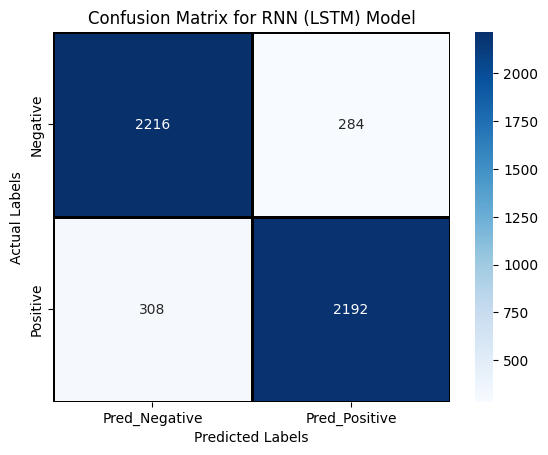




-------------------- Classification Report for RNN (LSTM) Model --------------------
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2500
           1       0.89      0.88      0.88      2500

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



In [29]:
#Predicting the values
rnn_pred = (rnn.predict(x_te) > 0.5).astype('int32')

#Printing Confusion Matrix using Heatmap
print('-'*20, 'Confusion Matrix', '-'*20)
rnn_cm = confusion_matrix(y_te, rnn_pred)
sns.heatmap(rnn_cm, cmap='Blues', annot=True, fmt='g', linecolor='black', linewidth=1, xticklabels=['Pred_Negative', 'Pred_Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for RNN (LSTM) Model')
plt.show();

print('\n\n')
print('-'*20, 'Classification Report for RNN (LSTM) Model', '-'*20)
rnn_cr = classification_report(y_te, rnn_pred)
print(rnn_cr)

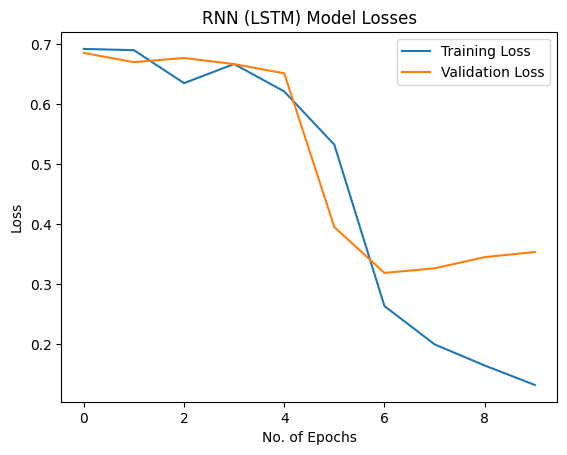

In [30]:
#Plotting Training Loss & Validation Loss vs Number of Epochs
plt.plot(RNN.history['loss'])
plt.plot(RNN.history['val_loss'])
plt.title('RNN (LSTM) Model Losses')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='best')
plt.show();

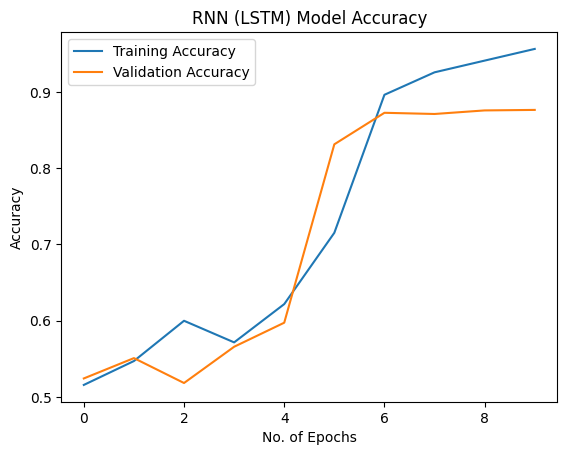

In [31]:
#Plotting Training Accuracy & Validation Accuracy vs Number of Epochs
plt.plot(RNN.history['accuracy'])
plt.plot(RNN.history['val_accuracy'])
plt.title('RNN (LSTM) Model Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='best')
plt.show();

#### 6. Use the designed model to print the prediction on any one sample. [5 Marks]

In [34]:
#Predicting the sentiment on test review.
#Getting a random integer to test the prediction
num = np.random.randint(0, len(x_te)+1, 1)
print('The Random Number is:', num, '\n')
print('The vector representing the review for randmon number {} is:\n {}'.format(num, x_te[int(num)]))
print('\n')
print('The decoded review alongwith it\'s original sentiment is:\n')
decode(x_te[int(num)], y_te[int(num)])
print('\n')

#Predicting using ANN Model
#print('-'*25, 'Predicting Using ANN Model', '-'*25)
review_prediction_ann = ann.predict(pad_sequences([x_te[int(num)]], max_length, padding='post', truncating='post') > 0.5).astype('int32')
print('The predicted Sentiment using ANN Model is:', review_prediction_ann[0][0], '/', sentiment.get(review_prediction_ann[0][0]))
print('\n')

#predicting using RNN Model
review_prediction_rnn = rnn.predict(pad_sequences([x_te[int(num)]], max_length, padding='post', truncating='post') > 0.5).astype('int32')
print('The predicted Sentiment using RNN (LSTM) Model is:', review_prediction_rnn[0][0], '/', sentiment.get(review_prediction_rnn[0][0]))

The Random Number is: [4866] 

The vector representing the review for randmon number [4866] is:
 [   1   17    6 2280  479  678   61   86  155    8  135 1379 2309   26
   24 1863   89   70    6 1325   81   15    4    2    7    4  286   11
   54   75   67 6893   11 1316   21   11   89   70   29 1345   15   11
    4   20    4  139   11    2   71 3506   99   95   18    4   65   18
  259   15  332 5271    2   25   28    4   65  347  208   50   45    4
   65    7 1080   15 1718  763    6  119   65   99    5    6 1579  649
  200  452    5  577  277  252   12  839 1674    8   61  523   21  198
   12   95  225    4  192   45  684  270   56   11  543   21   45  669
  324   33    4  852  252   45    6 1379 2138    5   45 1863    8    4
   58   21   12   16  578   15    4  139   71   24   32  270   11  543
  444   48  335  267   18    6  664    7  162 2323  140   79    6 2851
  479    6  147  664   23    4  479    7    5  162 2323   48   25  181
    6  119   65   15   80  721   25 1674    6   65 

### Observations:
- The downloaded dataset is already divided equally into train & test set, which we combine together & later on divided into 90:10 ratio for train & test set respectively.
- The dataset is a sequential data which means that it is already represented in vector form.
- We observe that the labels are distributed exactly in same number. Hence it is a perfectly balanced dataset.
- We have trained two models:
  - Simple **Artificial Neural Network**: Accuracy ~ **88%**, but we can see significiant difference in train accuracy & test accuracy which suggest that the model is slightly overfit.
  - **Recurrent Neural Network** with LSTM: Accuracy ~ **88%** which is equal to that of ANN. Here also we can observe significant difference in train accuracy & test accuracy.